**Identifying Surfer's Experience Based on Performed Manoeuvres**

**Guilherme Branco Loureiro**

Udacity Machine Learning Engineer Nanodegree - Capstone Project

August, 2019 - Florianópolis Brazil

***
# Modules Importation

In [1]:
import pandas as pd
import numpy as np
import random
import seaborn as sns

# Data Initial Exploration

## Exploring dataset content

In [2]:
df = pd.read_csv("df_manoeuvres_experience.csv")
df = df.drop(df.columns[0], axis=1)
df.head()

,manoeuvres_01_paddling,manoeuvres_02_drop,manoeuvres_03_straight_ahead,manoeuvres_04_wall_riding,manoeuvres_05_floater,manoeuvres_06_cut_back,manoeuvres_07_rasgada,manoeuvres_08_off_the_lip,manoeuvres_09_tube,manoeuvres_10_air,surfer_experience
0,Sempre consigo,Sempre consigo,Sempre consigo,Sempre consigo,Sempre consigo,Consigo normalmente,Consigo normalmente,Consigo normalmente,Consigo normalmente,As vezes eu consigo,Avançado
1,Consigo normalmente,As vezes eu consigo,Ainda não consigo,Ainda não consigo,Ainda não consigo,Ainda não consigo,Ainda não consigo,Ainda não consigo,Ainda não consigo,Ainda não consigo,Aprendiz
2,Sempre consigo,Consigo normalmente,Sempre consigo,Consigo normalmente,As vezes eu consigo,Consigo normalmente,Consigo normalmente,Consigo normalmente,As vezes eu consigo,Ainda não consigo,Avançado
3,Sempre consigo,Consigo normalmente,Não sei,Consigo normalmente,As vezes eu consigo,As vezes eu consigo,Consigo normalmente,Consigo normalmente,As vezes eu consigo,Ainda não consigo,Avançado
4,Sempre consigo,Consigo normalmente,Consigo normalmente,Sempre consigo,Consigo normalmente,Consigo normalmente,Sempre consigo,Sempre consigo,As vezes eu consigo,Ainda não consigo,Avançado


## Checking dataset size

In [3]:
df.shape[0]
print(f'The dataframe has {df.shape[0]} samples and {df.shape[1]} features')

The dataframe has 165 samples and 11 features


## Exploring features

In [4]:
df.columns;

**Dataset features:**
- manoeuvres_01_paddling
- manoeuvres_02_drop
- manoeuvres_03_straight_ahead
- manoeuvres_04_wall_riding
- manoeuvres_05_floater
- manoeuvres_06_cut_back
- manoeuvres_07_rasgada
- manoeuvres_08_off_the_lip
- manoeuvres_09_tube
- manoeuvres_10_air
- surfer_experience

The first 10 features are **inputs**, and the last one (`surfer_experience`) is an **output** to be further used as benchmark.

# Data Preprosseing

## Renaming features
The names of the features are to long for quick coding, so we'll shorten them by removing the 'manoeuvres_' prefix.

In [5]:
new_columns = []
for col in df.columns:
    if 'manoeuvre' in col:
        new_columns.append(col[11:])
    else:
        new_columns.append(col)

df.columns = new_columns
print('The new feature names are:')
[print(col) for col in df.columns];

The new feature names are:
01_paddling
02_drop
03_straight_ahead
04_wall_riding
05_floater
06_cut_back
07_rasgada
08_off_the_lip
09_tube
10_air
surfer_experience


## Translating to English
As noticed, the answers are in Portuguese, so we have to translate to English.

In [6]:
# Manoeuvres execution frequency
translation_dict = {
    'Ainda não consigo': 'Not yet',
    'As vezes eu consigo': 'Sometimes',
    'Consigo normalmente': 'Usually',
    'Sempre consigo': 'Always',
    'Não sei': "I don't know",
}

# Five expected levels of experience
level_dict = {
    'Aprendiz': 'FirstTimer',
    'Iniciante': 'Beginner',
    'Intermediário': 'Intermediate',
    'Avançado': 'Advanced',
    'Profissional': "Pro",
}

df.replace(inplace=True, to_replace=translation_dict)
df.replace(inplace=True, to_replace=level_dict)
df.head()

,01_paddling,02_drop,03_straight_ahead,04_wall_riding,05_floater,06_cut_back,07_rasgada,08_off_the_lip,09_tube,10_air,surfer_experience
0,Always,Always,Always,Always,Always,Usually,Usually,Usually,Usually,Sometimes,Advanced
1,Usually,Sometimes,Not yet,Not yet,Not yet,Not yet,Not yet,Not yet,Not yet,Not yet,FirstTimer
2,Always,Usually,Always,Usually,Sometimes,Usually,Usually,Usually,Sometimes,Not yet,Advanced
3,Always,Usually,I don't know,Usually,Sometimes,Sometimes,Usually,Usually,Sometimes,Not yet,Advanced
4,Always,Usually,Usually,Always,Usually,Usually,Always,Always,Sometimes,Not yet,Advanced


## Exploring data distribution

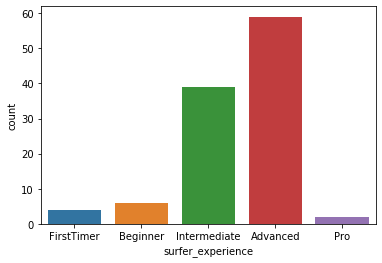

In [77]:
df['surfer_experience']
order = ['FirstTimer', 'Beginner', 'Intermediate', 'Advanced', 'Pro']
import seaborn as sns
sns.countplot(data = df, x='surfer_experience', order=order)

## Scaling frequency adverbs - 0 to 1

As seen in `df_x`, the answers express the frequency of execution of each manoeuvre.
Hence, we need to scale them from `0` to `1`, so they can be quantifiable.
For so, we'll use a replacement dictionary, as follows.

In [7]:
replacement_dict = {
    'Not yet': 0,
    'Sometimes': 0.33,
    'Usually': 0.66,
    'Always': 1,
    "I don't know": np.nan,
}
df.replace(inplace=True, to_replace=replacement_dict)

# Filling NaN with mean value
# df_x.fillna(df_x.mean(), inplace=True)
# df_x

## Managing NaN - Dropping rows full with NaN

In [8]:
# Dropping NaN in the 'surfer_experience' column
print(df.shape)
# df.dropna(how='any', subset=['surfer_experience'], inplace=True)
print(df.shape)
df.dropna(how='any', inplace=True)
print(df.shape)

(165, 11)
(165, 11)
(110, 11)


## Splitting features: input and output

In [9]:
# Prepare input features
df_x = df.drop(['surfer_experience'], axis=1)

# Filling NaN with mean value
# df_x.fillna(df_x.mean(), inplace=True)
df_x.head()

,01_paddling,02_drop,03_straight_ahead,04_wall_riding,05_floater,06_cut_back,07_rasgada,08_off_the_lip,09_tube,10_air
0,1.00,1.00,1.00,1.00,1.00,0.66,0.66,0.66,0.66,0.33
1,0.66,0.33,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,1.00,0.66,1.00,0.66,0.33,0.66,0.66,0.66,0.33,0.00
4,1.00,0.66,0.66,1.00,0.66,0.66,1.00,1.00,0.33,0.00
5,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.33


In [10]:
# Prepare output feature
# We'll put this feature on hold until further benchmarking
s_y = df['surfer_experience']
s_y.head()

0      Advanced
1    FirstTimer
2      Advanced
4      Advanced
5      Advanced
Name: surfer_experience, dtype: object

## Scaling experience level - 0 to 1

In [11]:
# TODO implement

# Correlation Analysis

## Getting correlation among features

In [12]:
df_corr = df_x.corr().round(2)
df_corr

,01_paddling,02_drop,03_straight_ahead,04_wall_riding,05_floater,06_cut_back,07_rasgada,08_off_the_lip,09_tube,10_air
01_paddling,1.00,0.63,0.51,0.54,0.32,0.39,0.42,0.37,0.30,0.12
02_drop,0.63,1.00,0.65,0.75,0.58,0.58,0.66,0.61,0.45,0.29
03_straight_ahead,0.51,0.65,1.00,0.62,0.38,0.43,0.42,0.40,0.27,0.13
04_wall_riding,0.54,0.75,0.62,1.00,0.63,0.63,0.70,0.69,0.49,0.27
05_floater,0.32,0.58,0.38,0.63,1.00,0.80,0.82,0.84,0.81,0.58
06_cut_back,0.39,0.58,0.43,0.63,0.80,1.00,0.86,0.77,0.73,0.52
07_rasgada,0.42,0.66,0.42,0.70,0.82,0.86,1.00,0.85,0.72,0.48
08_off_the_lip,0.37,0.61,0.40,0.69,0.84,0.77,0.85,1.00,0.74,0.51
09_tube,0.30,0.45,0.27,0.49,0.81,0.73,0.72,0.74,1.00,0.64
10_air,0.12,0.29,0.13,0.27,0.58,0.52,0.48,0.51,0.64,1.00


## Plot correlation heatmap
Numbers are good, but colors are better!

> "The stronger the red, the stronger the correlation"

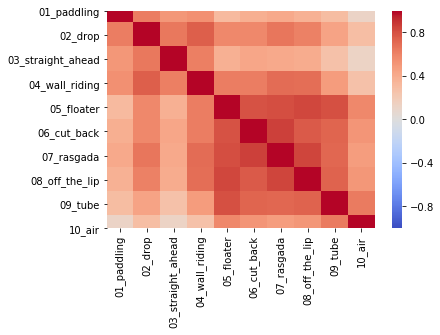

In [13]:
ax = sns.heatmap(df_corr, cmap='coolwarm', vmin=-1, vmax=1)

# Data Sampling

## Getting random samples  [maybe del latter]

In [14]:
df.shape[0]

110

In [15]:
indices = []
for i in range(5):
    id = random.randrange(df.shape[0])
    indices.append(id)
print(indices)

samples = pd.DataFrame(df_x.iloc[indices], columns = df_x.keys())#.reset_index(drop = True)
samples
# [112, 2, 10, 49, 120]


[2, 1, 74, 40, 25]


,01_paddling,02_drop,03_straight_ahead,04_wall_riding,05_floater,06_cut_back,07_rasgada,08_off_the_lip,09_tube,10_air
2,1.00,0.66,1.00,0.66,0.33,0.66,0.66,0.66,0.33,0.00
1,0.66,0.33,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
108,1.00,0.66,1.00,0.66,0.00,0.00,0.00,0.33,0.00,0.00
56,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.33
39,1.00,0.66,0.66,0.66,0.00,0.00,0.00,0.33,0.00,0.00


## Getting artificial samples

**Artificial sampling logic:**
> In order to verify how well our clustering algorithm is performing, we must analyze individual cases. For so, we'll define a sample for each expected experience level as in `level_dict`.

In [16]:
# Create a sample CSV file as a template for the samples
samples = pd.DataFrame(df_x.loc[indices], columns = df_x.keys()).reset_index(drop = True)
samples.to_csv('df_samples_template.csv', index=False)

**PAUSE!**

External actions executed:
- Renamed `df_samples_template.csv` as `df_samples_artificial.csv`
- Filled `df_samples_artificial.csv` with samples of which manoeuvres each level of surfer can perform

In [17]:
# Manually alter 'df_samples_artificial.csv' with 
df_samples_artificial = pd.read_csv('df_samples_artificial.csv')
df_samples_artificial

,01_paddling,02_drop,03_straight_ahead,04_wall_riding,05_floater,06_cut_back,07_rasgada,08_off_the_lip,09_tube,10_air
0,1,0.5,0.5,0,0,0.0,0.0,0,0.0,0
1,0,0.0,0.0,0,0,0.0,0.0,0,0.0,0
2,1,1.0,1.0,1,0,0.5,0.5,0,0.0,0
3,1,1.0,1.0,1,1,1.0,1.0,1,0.5,0
4,1,1.0,1.0,1,1,1.0,1.0,1,1.0,1


# Dimensionality Reduction

## Implementing PCA

In [18]:
# TODO Implement PCA
from sklearn.decomposition import PCA
import visuals as vs


# TODO: Apply PCA by fitting the good data with the same number of dimensions as features
pca = PCA(n_components=2)
pca.fit(df_x);

### Visualizing PCA dimensions plot

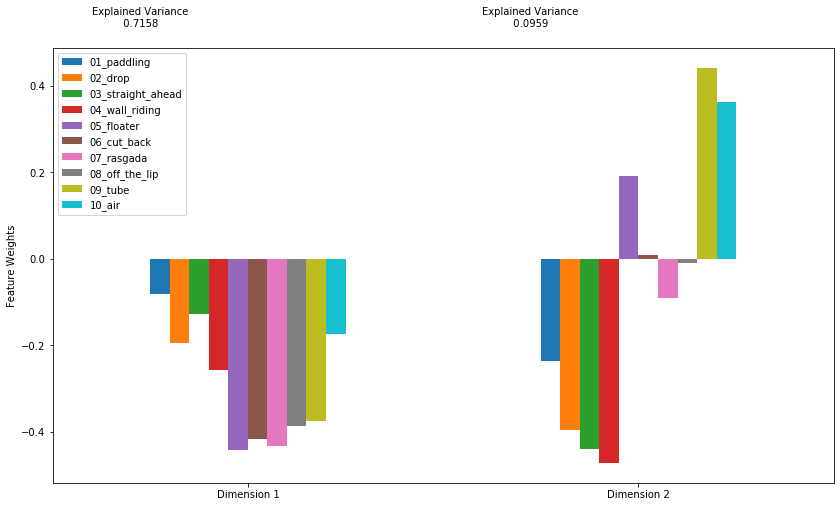

In [19]:
pca_results = vs.pca_results(df_x, pca)

### Analyzing explained variance

In [20]:
explained_variance = pca.explained_variance_ratio_.cumsum()
explained_variance

array([0.71581954, 0.81170869])

In [21]:
# TODO: Transform the good data using the PCA fit above
reduced_data = pca.transform(df_x)

# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(samples)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

In [22]:
## Functions preparation

import matplotlib.pyplot as plt
def biplot(good_data, reduced_data, pca, colors=None):
    '''
    Produce a biplot that shows a scatterplot of the reduced
    data and the projections of the original features.
    
    good_data: original data, before transformation.
               Needs to be a pandas dataframe with valid column names
    reduced_data: the reduced data (the first two dimensions are plotted)
    pca: pca object that contains the components_ attribute

    return: a matplotlib AxesSubplot object (for any additional customization)
    
    This procedure is inspired by the script:
    https://github.com/teddyroland/python-biplot
    '''

    fig, ax = plt.subplots(figsize = (14, 8))

    # scatterplot of the reduced data    
    ax.scatter(x=reduced_data.loc[:, 'Dimension 1'], y=reduced_data.loc[:, 'Dimension 2'], 
        facecolors=colors,
        edgecolors='b',
        s=70,
#         alpha=0.5
        )
    
    feature_vectors = pca.components_.T

    # we use scaling factors to make the arrows easier to see
    arrow_size, text_pos = 1.1, 1.2,


    # projections of the original features
    for i, v in enumerate(feature_vectors):
        ax.arrow(0, 0, arrow_size*v[0], arrow_size*v[1], 
                  head_width=0.05, head_length=0.05, linewidth=1, color='red')
        ax.text(v[0]*text_pos, v[1]*text_pos, good_data.columns[i], color='black', 
                 ha='center', va='center', fontsize=10)

    ax.set_xlabel("Dimension 1", fontsize=14)
    ax.set_ylabel("Dimension 2", fontsize=14)
    ax.set_title("PC plane with original feature projections.", fontsize=16)

    return ax

In [23]:
colors_dict = {
    'FirstTimer': 'red',
    'Beginner': 'orange',
    'Intermediate': 'yellow',
    'Advanced': 'green',
    'Pro': 'blue',
}
print(list(s_y))
s_y.fillna('error_gui', inplace=True)
print(colors_dict[s_y[0]])
s_colors = s_y.apply(lambda x: colors_dict.get(x, 'white'))
s_colors.head()

['Advanced', 'FirstTimer', 'Advanced', 'Advanced', 'Advanced', 'Advanced', 'Intermediate', 'Advanced', 'Intermediate', 'Advanced', 'Intermediate', 'Advanced', 'Advanced', 'Advanced', 'Advanced', 'FirstTimer', 'FirstTimer', 'Advanced', 'Advanced', 'Advanced', 'Beginner', 'Intermediate', 'Beginner', 'Intermediate', 'Intermediate', 'Intermediate', 'Advanced', 'Advanced', 'Advanced', 'Beginner', 'Intermediate', 'Intermediate', 'Advanced', 'Advanced', 'Beginner', 'Intermediate', 'Advanced', 'Beginner', 'Intermediate', 'Intermediate', 'Advanced', 'Advanced', 'Intermediate', 'Intermediate', 'Intermediate', 'Intermediate', 'Intermediate', 'Advanced', 'Intermediate', 'Intermediate', 'Intermediate', 'Advanced', 'Advanced', 'Advanced', 'Intermediate', 'Advanced', 'Intermediate', 'Intermediate', 'FirstTimer', 'Advanced', 'Advanced', 'Advanced', 'Beginner', 'Advanced', 'Intermediate', 'Advanced', 'Advanced', 'Advanced', 'Advanced', 'Advanced', 'Advanced', 'Intermediate', 'Intermediate', 'Advanced',

0    green
1      red
2    green
4    green
5    green
Name: surfer_experience, dtype: object

### Visualizing PCA Biplot

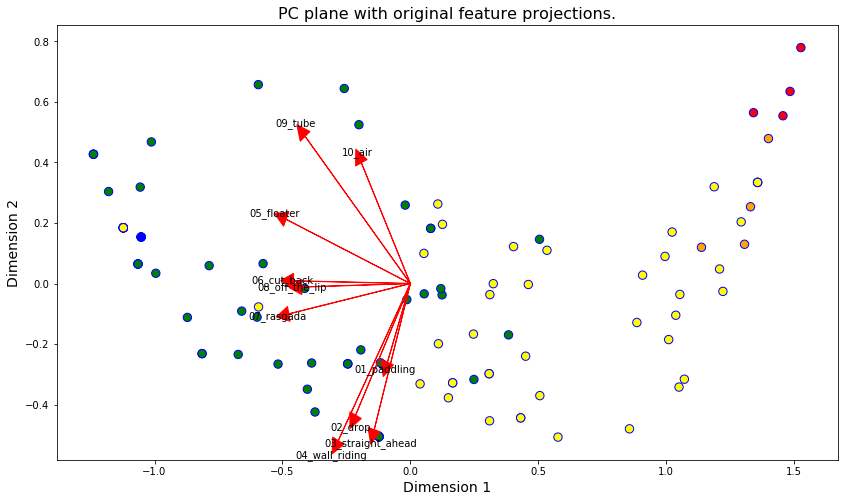

In [24]:
# Create a biplot
biplot(df_x, reduced_data, pca, s_colors);

In [25]:
print('BIPLOT LEGEND')
for k, v in colors_dict.items():
    k = k.ljust(14)
    print(f'\tLevel: {k}color: {v}')

BIPLOT LEGEND
	Level: FirstTimer    color: red
	Level: Beginner      color: orange
	Level: Intermediate  color: yellow
	Level: Advanced      color: green
	Level: Pro           color: blue


### Interpreting PCA Biplot

**Interpreting PCA biplot**

In the biplot visualization the direction of the vectors indicate how aligned they are with each other.
Paddling, Drop, Straight ahead and Wall riding are close on the bottom of the figure.
Cut_back, rasgada and off_the_lip are also close to each other, on the left of the figure parallel to the horizontal axis.
The last three (floater, tube and air) are a bit far from each other.
The interesting thing about these vectors is the significance of their angles.
The easiest manoeuvre to perform is paddling, whilst the hardest is air.
Therefore, the difficulty of each manoeuvre is expressed clock-wise.
Hours in a clock are equivalent to the experience required.
If we had to to segment the surfer's experience in 10 cluster, we'd succeed by following the manoeuvres clock-wise.
This represents a verification concept.

We could imagine a 5 cluster division:
1. Paddling, Drop, Straight ahead and Wall riding
2. Cut_back, rasgada and off_the_lip
3. Floater
4. Tube
5. Air

But, we can check such division more objectively...

## Implementing t-SNE

In [26]:
from sklearn.manifold import TSNE
import time

time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=5, n_iter=300)
tsne_results = tsne.fit_transform(df_x)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 110 samples in 0.000s...
[t-SNE] Computed neighbors for 110 samples in 0.001s...
[t-SNE] Computed conditional probabilities for sample 110 / 110
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 69.579033
[t-SNE] KL divergence after 300 iterations: 1.868320
t-SNE done! Time elapsed: 0.12975287437438965 seconds


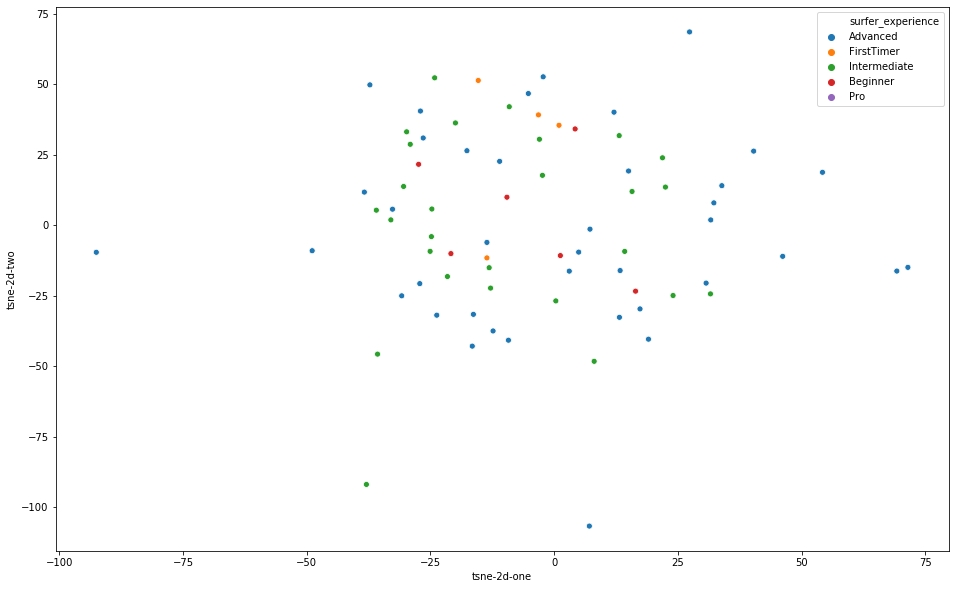

In [27]:
df_subset = pd.DataFrame()

df_subset['tsne-2d-one'] = tsne_results[:,0]
df_subset['tsne-2d-two'] = tsne_results[:,1]

plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue=df['surfer_experience'],
#     palette=sns.color_palette("hls", 10),
    data=df_subset,
    legend="full",
#     alpha=0.3
);

### Interpreting t-SNE biplot
One negative aspect of the t-SNE results is the fact that there are some 'beginner' dots (in red) mixed with 'intermediate' and 'advanced'

## Comparing PCA and t-SNE
This does not occurs in the PCA biplot

# Clustering

## Implementing K-means

In [28]:
# TODO Implement K-means

## Implementing GMM

In [29]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

def build_clusters(n_components, reduced=True):
    if reduced:
        data = reduced_data
    else:
        data = df_x
    
    # TODO: Apply your clustering algorithm of choice to the reduced data 
    clusterer = GaussianMixture(n_components=n_components)
    clusterer.fit(data)

    # TODO: Predict the cluster for each data point
    preds = clusterer.predict(data)

    # TODO: Find the cluster centers
    centers = clusterer.means_

    # TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
    score = silhouette_score(X=data, labels=preds)
    print('For', clusterer.n_components, 'clusters, the silhouette score is:', score)
    
    return preds, centers

In [30]:
for i in range(2, 10):
    build_clusters(i)

For 2 clusters, the silhouette score is: 0.4054686505578568
For 3 clusters, the silhouette score is: 0.4946756698827165
For 4 clusters, the silhouette score is: 0.4855986161542287
For 5 clusters, the silhouette score is: 0.4816521472237324
For 6 clusters, the silhouette score is: 0.4075788386263694
For 7 clusters, the silhouette score is: 0.4619379458392695
For 8 clusters, the silhouette score is: 0.2550074443504606
For 9 clusters, the silhouette score is: 0.4509547979794448


**Silhouette score analysis:**
- For  2 clusters, the silhouette score is: 0.411 **3rd**
- For  3 clusters, the silhouette score is: 0.341
- For  4 clusters, the silhouette score is: 0.459 **1st**
- For  5 clusters, the silhouette score is: 0.434 **2st**
- For  6 clusters, the silhouette score is: 0.368
- For  7 clusters, the silhouette score is: 0.312
- For  8 clusters, the silhouette score is: 0.408
- For  9 clusters, the silhouette score is: 0.374

### Visualizing PCA biplot [not GMM right?]

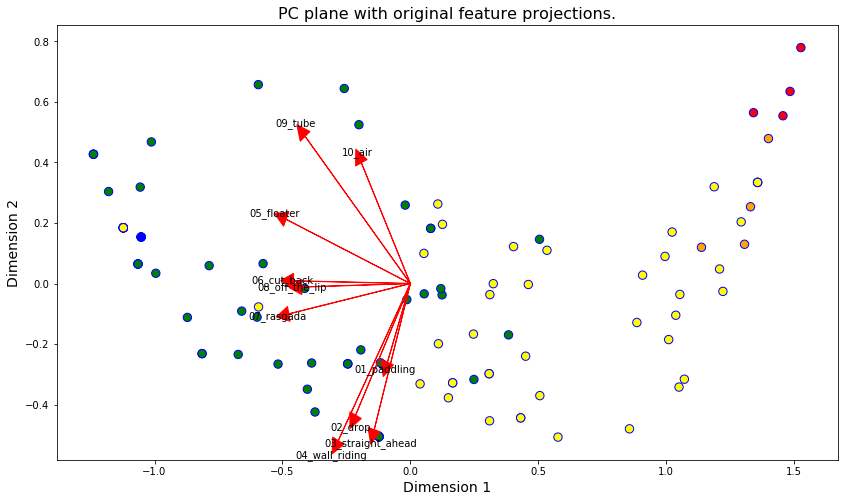

In [31]:
biplot(df_x, reduced_data, pca, s_colors);
# Talvez unir features mais alinhadas e criar novas

### Estimating the cluster of data GMM

For 5 clusters, the silhouette score is: 0.3752715133443227


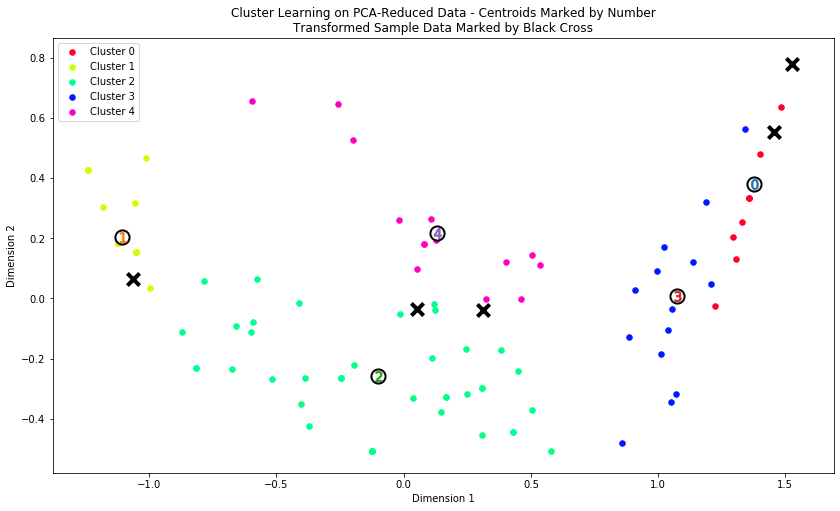

In [58]:
# REDUCED
# Display the results of the clustering from implementation
preds, centers = build_clusters(5)
vs.cluster_results(reduced_data, preds, centers, pca_samples)

For 4 clusters, the silhouette score is: 0.4855986161542287


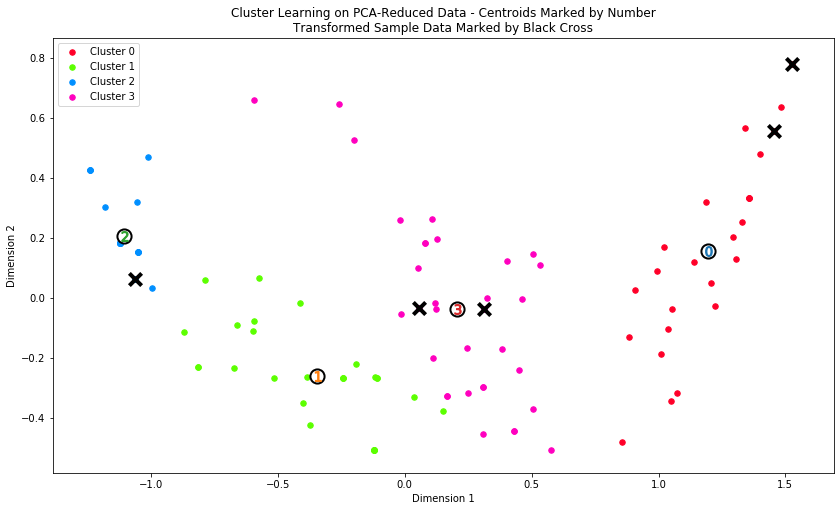

In [70]:
# REDUCED
# Display the results of the clustering from implementation
preds, centers = build_clusters(4)
vs.cluster_results(reduced_data, preds, centers, pca_samples)

In [59]:
cluster_dict={
    0: 'FirstTimer',
    3: 'Beginner',
    2: 'Intermediate',
    4: 'Intermediate',
    1: 'Advanced',
    1: 'Pro',
}

### Calculating score

In [60]:
experience_list = [
    'FirstTimer',
    'Beginner',
    'Intermediate',
    'Advanced',
    'Pro',
]

def calc_score(a, b, score):
    a_i = experience_list.index(a)
    b_i = experience_list.index(b)
#     print(a, b)
#     print(a_i == b_i)
    delta = abs(a_i - b_i)
    if delta == 0:
        score += 1
    elif delta == 1:
        score += 0.5
    else:
        score += 0
        
    return score

In [67]:
preds
counter = 0
score = 0
for i, pred in enumerate(preds):
    pred = cluster_dict[preds[i]]
    ref = list(s_y)[i]
    score = calc_score(pred, ref, score)
    print(str(i).ljust(4), pred.ljust(15), ref.ljust(15), str(pred==ref).ljust(8), f'Score: {str(score).ljust(6)}Counter: {counter}')
    if pred == ref:
        counter += 1

print(f'\nNumber of alike data points: {counter}')
print(f'\nOverall score: {round(100*score/s_y.shape[0], 1)}%')


0    Intermediate    Advanced        False    Score: 0.5   Counter: 0
1    FirstTimer      FirstTimer      True     Score: 1.5   Counter: 0
2    Intermediate    Advanced        False    Score: 2.0   Counter: 1
3    Intermediate    Advanced        False    Score: 2.5   Counter: 1
4    Pro             Advanced        False    Score: 3.0   Counter: 1
5    Pro             Advanced        False    Score: 3.5   Counter: 1
6    Intermediate    Intermediate    True     Score: 4.5   Counter: 1
7    Intermediate    Advanced        False    Score: 5.0   Counter: 2
8    Intermediate    Intermediate    True     Score: 6.0   Counter: 2
9    Intermediate    Advanced        False    Score: 6.5   Counter: 3
10   Beginner        Intermediate    False    Score: 7.0   Counter: 3
11   Pro             Advanced        False    Score: 7.5   Counter: 3
12   Intermediate    Advanced        False    Score: 8.0   Counter: 3
13   Pro             Advanced        False    Score: 8.5   Counter: 3
14   Pro            

### Interpretating GMM

The biplot's clusters are best read from right to left:
- 1 - FirstTimer
- 4 - Beginner
- 3, 5 - Intermediate
- 0 - Advanced
- 2 - Pro

In [ ]:
# Display the results of the clustering from implementation
import visuals as vs

preds, centers = build_clusters(8)
vs.cluster_results(reduced_data, preds, centers, pca_samples)

**4 Clusters interpretation:**

Tobecompleted

In [ ]:
s_y.iloc[indices]

In [ ]:
# indice 158 eh o mais avançado
samples

In [ ]:
pca_samples

In [ ]:
# Display the results of the clustering from implementation
preds, centers = build_clusters(5)
vs.cluster_results(reduced_data, preds, centers, pca_samples)

**5 Clusters interpretation:**

Tobecompleted

In [ ]:
# Display the results of the clustering from implementation
preds, centers = build_clusters(2)
vs.cluster_results(reduced_data, preds, centers, pca_samples)

**2 Clusters interpretation:**

Tobecompleted

In [ ]:
# TODO Implement t-SNE

In [ ]:
# TODO Compare PCA vs. t-SNE

A good explanation and comparison of PCA and t-SNE are presented [here.](https://towardsdatascience.com/visualising-high-dimensional-datasets-using-pca-and-t-sne-in-python-8ef87e7915b).
One of the main differences are:
> "t-Distributed Stochastic Neighbor Embedding (t-SNE) is another technique for dimensionality reduction and is particularly well suited for the visualization of high-dimensional datasets. Contrary to PCA it is not a mathematical technique but a probablistic one." By *Luuk Derksen*




## Implementing Spectral

# Benchmarking

## GMM vs. K-means

## GMM vs. known label

In [ ]:
# TODO compare them visually and in a table(quantify)
s_y

# Evaluation

## Analyzing performance of the clustering model

## Analyzing the Silhouette Coefficient

In [ ]:
# TODO implement the Silhouette Coefficient 

## Exploring the number of clusters

# Conclusion

## Work recap
In this work...:
- two dimensionality reduction algorithms were tested (PCA and t-SNE)
- n clustering methods were deployed
- 

## Reflection
- An unsupervised approach was chosen in order to analyze how well clustering methods could split the different levels of surfer's experience .

## Future work
- Apply a supervised approach based on the known labels of the `surfer_experience`